<a href="https://colab.research.google.com/github/praveenkumarmutcharla/Algorithms/blob/master/Grp_073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import random
import numpy as np

In [141]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [142]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [143]:
# Scale the data
X_train/=255
X_test/=255

# Transform target variable into one-hotencoding
# y_cat_train = to_categorical(y_train, 10)
# y_cat_test = to_categorical(y_test, 10)

y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

Shapes of train and test data.

In [144]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

TypeError: ignored

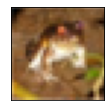

In [146]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Original Images

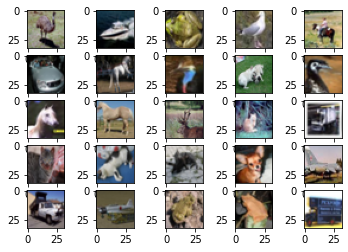

In [147]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=25, seed=499):
  for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_batch[i])
  plt.show()
  break

**Augmented Images**

**Rotating Images**

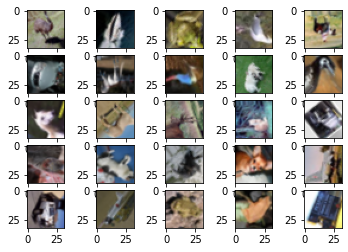

In [ ]:
datagen = ImageDataGenerator(rotation_range=359)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=25, seed=499):
  for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_batch[i])
  plt.show()
  break

Height Shift Range

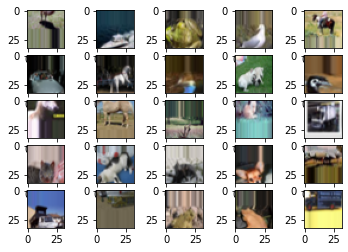

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=25, seed=499):
  for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_batch[i])
  plt.show()
  break

**Model Building**

In [170]:
model = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(100, activation="relu", name="inputLayer"),
        layers.Dense(70, activation="relu", name="hiddenLayer1"),
        layers.Dense(80, activation="relu", name="hiddenLayer2"),
        layers.Dense(90, activation="relu", name="hiddenLayer3"),
        layers.Dense(10, activation="sigmoid",name="outputLayer"),
    ]
)

**Model Compilation**

In [171]:
METRICS = [
    'accuracy'
]
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=METRICS)


 **`model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS) `** This code compiles model with loss function and uses adam optimiser as it adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum. The default learning rate is 0.01 and no momentum is used by default.

Model Summary

In [172]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 3072)              0         
                                                                 
 inputLayer (Dense)          (None, 100)               307300    
                                                                 
 hiddenLayer1 (Dense)        (None, 70)                7070      
                                                                 
 hiddenLayer2 (Dense)        (None, 80)                5680      
                                                                 
 hiddenLayer3 (Dense)        (None, 90)                7290      
                                                                 
 outputLayer (Dense)         (None, 10)                910       
                                                                 
Total params: 328,250
Trainable params: 328,250
Non-t

Model Training

In [173]:

# train the model

r = model.fit( X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 3s 4ms/step - loss: 2.0168 - accuracy: 0.2642
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.8709 - accuracy: 0.3184
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.8301 - accuracy: 0.3345
Epoch 4/25
782/782 [==============================] - 3s 3ms/step - loss: 1.8154 - accuracy: 0.3382
Epoch 5/25
782/782 [==============================] - 3s 3ms/step - loss: 1.8091 - accuracy: 0.3435
Epoch 6/25
782/782 [==============================] - 3s 3ms/step - loss: 1.7947 - accuracy: 0.3449
Epoch 7/25
782/782 [==============================] - 3s 3ms/step - loss: 1.7974 - accuracy: 0.3436
Epoch 8/25
782/782 [==============================] - 3s 3ms/step - loss: 1.7854 - accuracy: 0.3497
Epoch 9/25
782/782 [==============================] - 3s 3ms/step - loss: 1.7946 - accuracy: 0.3472
Epoch 10/25
782/782 [==============================] - 3s 3ms/step - loss: 1.7936 - accuracy: 0.3482

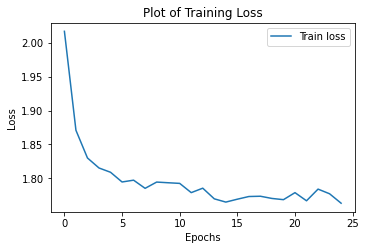

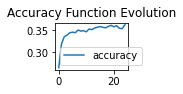

In [174]:
plt.figure(figsize=(12, 16))

# plt.subplot(4, 2, 1)
# plt.plot(r.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'], label='val_Loss')
# plt.title('Loss Function Evolution')
# plt.legend()
plt.subplot(4, 2, 2)
plt.plot(r.history['loss'], label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

plt.subplot(4, 4, 4)
plt.plot(r.history['accuracy'], label='accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()


**Model Evaluation**


In [162]:
# y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 1.8434 - accuracy: 0.3227
Test Accuracy : 32.27%


In [163]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

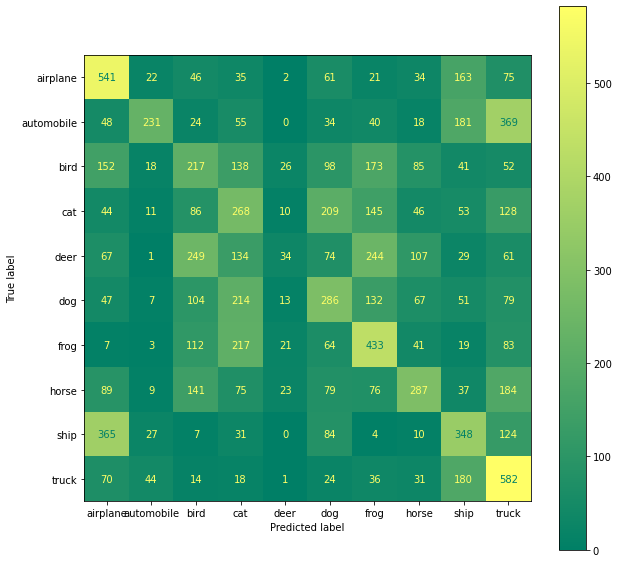

In [164]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='horizontal', ax=ax,cmap='summer')

plt.show()

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.54      0.45      1000
           1       0.62      0.23      0.34      1000
           2       0.22      0.22      0.22      1000
           3       0.23      0.27      0.25      1000
           4       0.26      0.03      0.06      1000
           5       0.28      0.29      0.28      1000
           6       0.33      0.43      0.38      1000
           7       0.40      0.29      0.33      1000
           8       0.32      0.35      0.33      1000
           9       0.34      0.58      0.43      1000

    accuracy                           0.32     10000
   macro avg       0.34      0.32      0.31     10000
weighted avg       0.34      0.32      0.31     10000



Identifying misclassified image
Test on single image

In [166]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

(32, 32, 3)
(1, 32, 32, 3)
[[0.25803322 0.31961223 0.76996887 0.726756   0.7410191  0.7165515
  0.847783   0.49364424 0.09959941 0.15289648]]


6

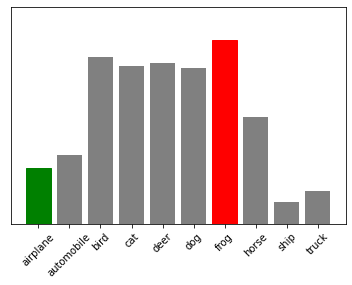

In [167]:
# verification our prediction on single image

i=4 # image number 0. You may change value of i for play around
xtrain2=X_train.reshape(50000,32,32,3)
xtest2=X_test.reshape(10000,32,32,3)
predictions=model.predict(xtest2)
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,y_test)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

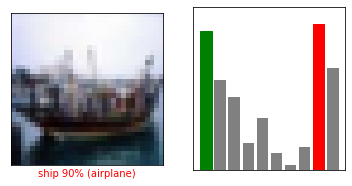

In [168]:
# defining parameters to pass to function
i=18 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

Verifying several images

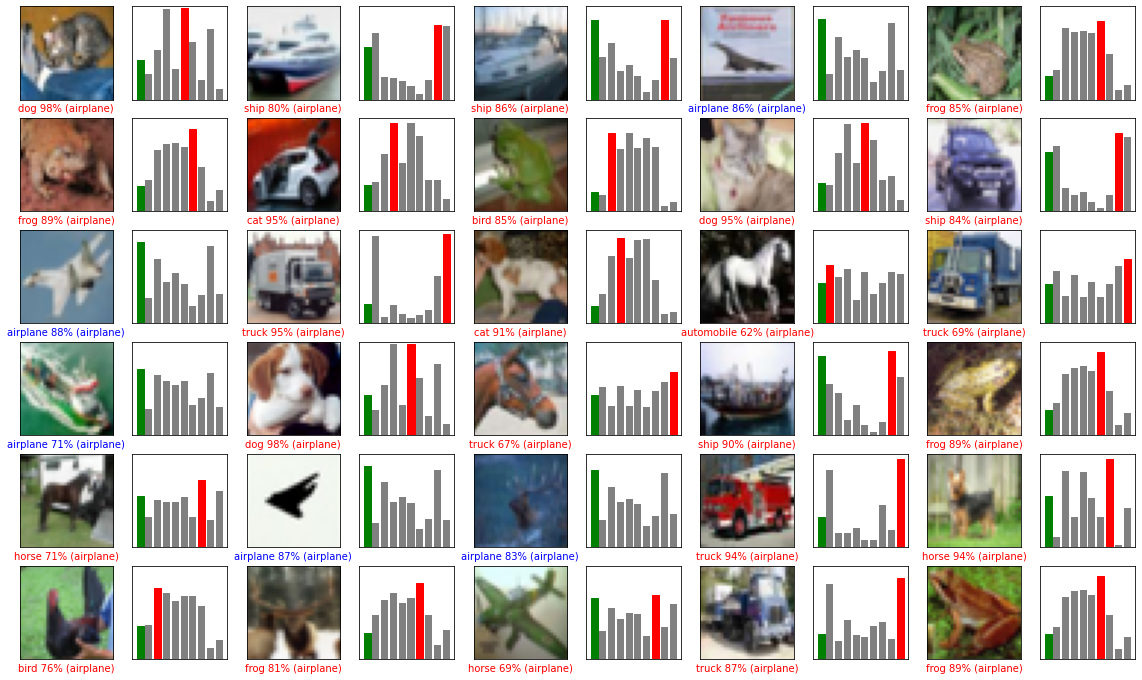

In [169]:
num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

Most of the images can be identified except in few cases for Deer and Automobile. Model is poor at identifying Deer.

***Hyperparameter Tuning***

**Model 2**

**Model Building**

In [193]:
model2 = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(100, activation="relu", name="inputLayer"),
        layers.Dense(800, activation="relu", name="hiddenLayer1"),
        layers.Dense(600, activation="relu", name="hiddenLayer2"),
        layers.Dense(10, activation="sigmoid",name="outputLayer"),
    ]
)

**Model Compilation**

In [194]:
METRICS = [
    'accuracy'
]
opt = keras.optimizers.SGD(learning_rate=0.05)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=METRICS)


**Model Summary**

In [195]:
model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 3072)              0         
                                                                 
 inputLayer (Dense)          (None, 100)               307300    
                                                                 
 hiddenLayer1 (Dense)        (None, 800)               80800     
                                                                 
 hiddenLayer2 (Dense)        (None, 600)               480600    
                                                                 
 outputLayer (Dense)         (None, 10)                6010      
                                                                 
Total params: 874,710
Trainable params: 874,710
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [196]:
r = model2.fit( X_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
782/782 [==============================] - 3s 3ms/step - loss: 1.9084 - accuracy: 0.3096
Epoch 2/15
782/782 [==============================] - 3s 3ms/step - loss: 1.6975 - accuracy: 0.3917
Epoch 3/15
782/782 [==============================] - 3s 3ms/step - loss: 1.6067 - accuracy: 0.4240
Epoch 4/15
782/782 [==============================] - 3s 3ms/step - loss: 1.5418 - accuracy: 0.4502
Epoch 5/15
782/782 [==============================] - 3s 3ms/step - loss: 1.4863 - accuracy: 0.4696
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss: 1.4399 - accuracy: 0.4862
Epoch 7/15
782/782 [==============================] - 3s 3ms/step - loss: 1.4040 - accuracy: 0.4993
Epoch 8/15
782/782 [==============================] - 3s 3ms/step - loss: 1.3662 - accuracy: 0.5143
Epoch 9/15
782/782 [==============================] - 3s 3ms/step - loss: 1.3328 - accuracy: 0.5266
Epoch 10/15
782/782 [==============================] - 3s 3ms/step - loss: 1.2987 - accuracy: 0.5372

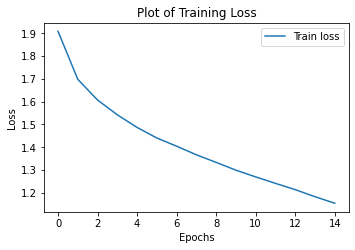

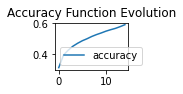

In [197]:
plt.figure(figsize=(12, 16))

# plt.subplot(4, 2, 1)
# plt.plot(r.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'], label='val_Loss')
# plt.title('Loss Function Evolution')
# plt.legend()
plt.subplot(4, 2, 2)
plt.plot(r.history['loss'], label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

plt.subplot(4, 4, 4)
plt.plot(r.history['accuracy'], label='accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

**Model Evaluation**

In [198]:
evaluation = model2.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 1.4120 - accuracy: 0.5000
Test Accuracy : 50.00%


In [199]:
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

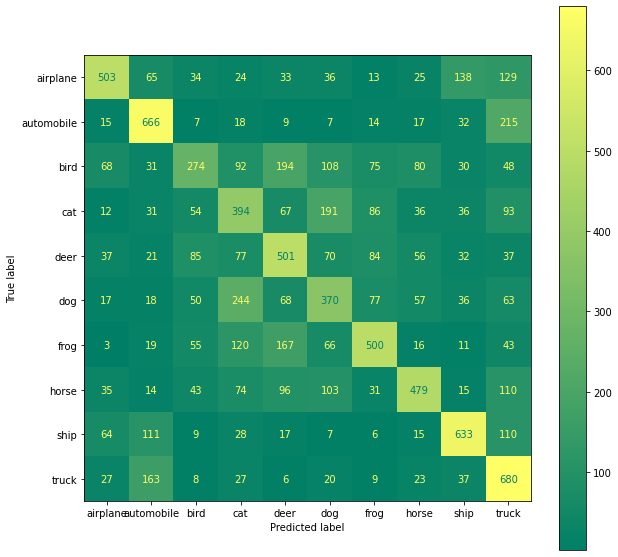

In [200]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='horizontal', ax=ax,cmap='summer')

plt.show()

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56      1000
           1       0.58      0.67      0.62      1000
           2       0.44      0.27      0.34      1000
           3       0.36      0.39      0.38      1000
           4       0.43      0.50      0.46      1000
           5       0.38      0.37      0.37      1000
           6       0.56      0.50      0.53      1000
           7       0.60      0.48      0.53      1000
           8       0.63      0.63      0.63      1000
           9       0.45      0.68      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



(32, 32, 3)
(1, 32, 32, 3)
[[0.05837733 0.07036614 0.781512   0.82067496 0.9978781  0.7539625
  0.9748164  0.0567614  0.25972158 0.0255287 ]]


4

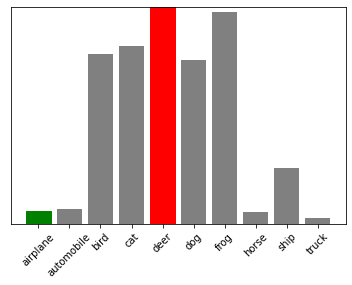

In [202]:
# verification our prediction on single image

i=4 # image number 0. You may change value of i for play around
xtrain2=X_train.reshape(50000,32,32,3)
xtest2=X_test.reshape(10000,32,32,3)
predictions=model2.predict(xtest2)
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model2.predict(img)
print(predictions_single)

plot_value_array(i, predictions,y_test)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

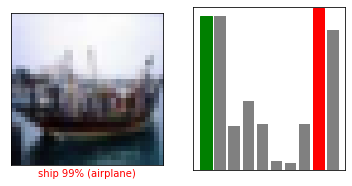

In [203]:
# defining parameters to pass to function
i=18 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

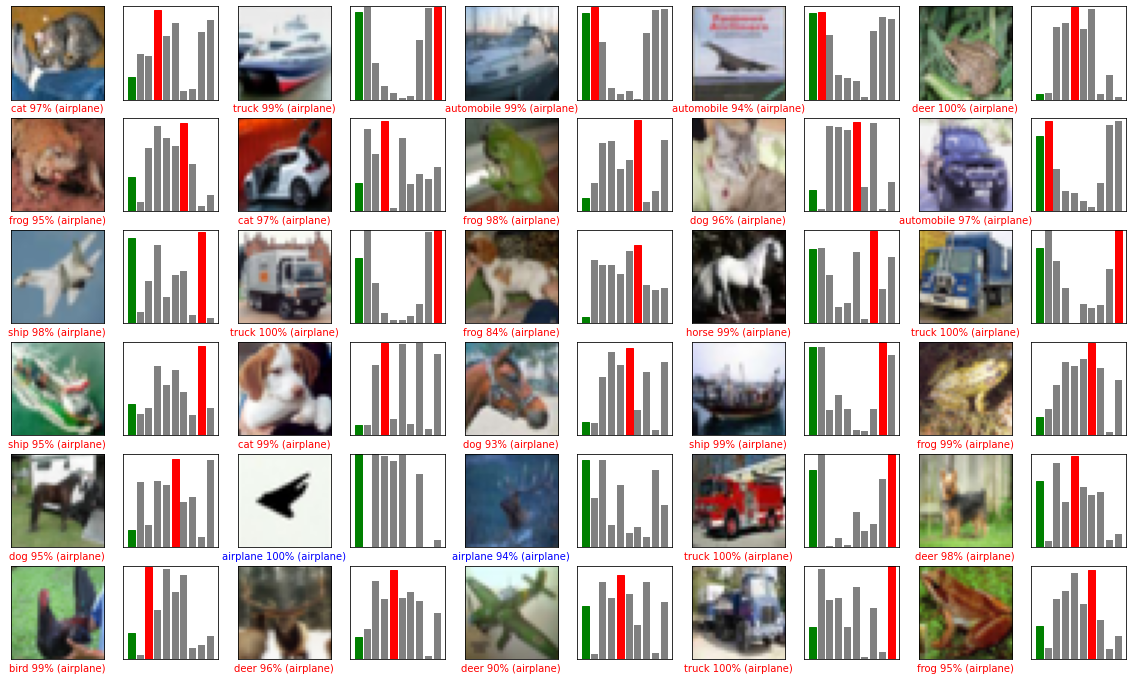

In [204]:
num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

**Model 3**

**Model Building**

In [206]:
model3 = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(100, activation="relu", name="inputLayer"),
        layers.Dense(150, activation="relu", name="hiddenLayer1"),
        layers.Dense(180, activation="relu", name="hiddenLayer2"),
        layers.Dense(190, activation="relu", name="hiddenLayer3"),
        layers.Dense(200, activation="relu", name="hiddenLayer4"),
        layers.Dense(10, activation="sigmoid",name="outputLayer"),
    ]
)

**Model Compilation**

In [209]:
METRICS = [
    'accuracy'
]
opt = keras.optimizers.Adamax(learning_rate=0.1)
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=METRICS)


**Model summary**

In [210]:
model3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 3072)              0         
                                                                 
 inputLayer (Dense)          (None, 100)               307300    
                                                                 
 hiddenLayer1 (Dense)        (None, 150)               15150     
                                                                 
 hiddenLayer2 (Dense)        (None, 180)               27180     
                                                                 
 hiddenLayer3 (Dense)        (None, 190)               34390     
                                                                 
 hiddenLayer4 (Dense)        (None, 200)               38200     
                                                                 
 outputLayer (Dense)         (None, 10)              

**Model Training**

In [212]:
r = model3.fit( X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3050 - accuracy: 0.0993
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3056 - accuracy: 0.0991
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3060 - accuracy: 0.1015
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3059 - accuracy: 0.1006
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3056 - accuracy: 0.0998
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3057 - accuracy: 0.1013
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3055 - accuracy: 0.1013
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3058 - accuracy: 0.1018
Epoch 9/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3061 - accuracy: 0.1002
Epoch 10/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3059 - accuracy: 0.1007

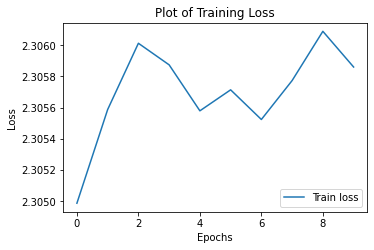

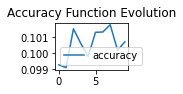

In [213]:
plt.figure(figsize=(12, 16))


plt.subplot(4, 2, 2)
plt.plot(r.history['loss'], label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

plt.subplot(4, 4, 4)
plt.plot(r.history['accuracy'], label='accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

**Model Evaluation**

In [215]:
y_cat_test = to_categorical(y_test, 10)
evaluation = model3.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 2.3081 - accuracy: 0.1000
Test Accuracy : 10.00%


In [216]:
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

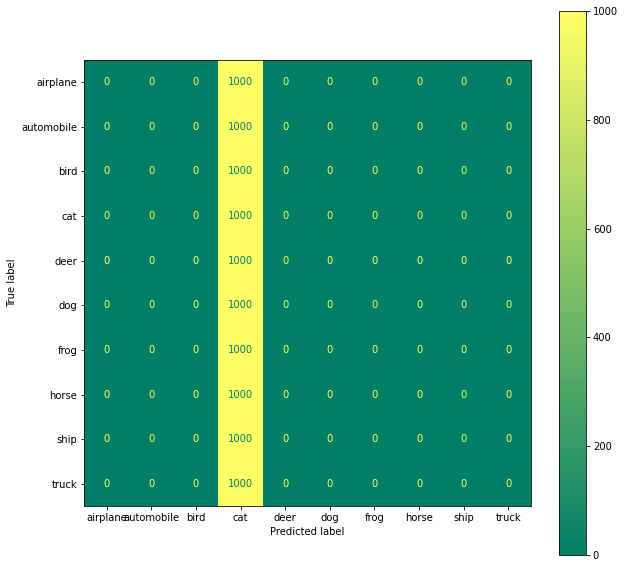

In [217]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='horizontal', ax=ax,cmap='summer')

plt.show()

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(32, 32, 3)
(1, 32, 32, 3)
[[0.5215785  0.48052403 0.5240947  0.5601731  0.5023562  0.5233574
  0.46422392 0.52108264 0.50813556 0.48383123]]


3

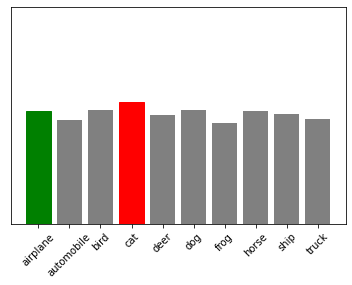

In [219]:
# verification our prediction on single image

i=4 # image number 0. You may change value of i for play around
xtrain2=X_train.reshape(50000,32,32,3)
xtest2=X_test.reshape(10000,32,32,3)
predictions=model3.predict(xtest2)
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model3.predict(img)
print(predictions_single)

plot_value_array(i, predictions,y_test)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

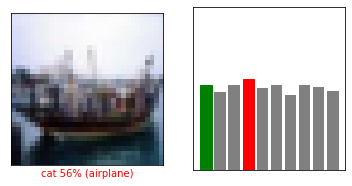

In [220]:
# defining parameters to pass to function
i=18 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

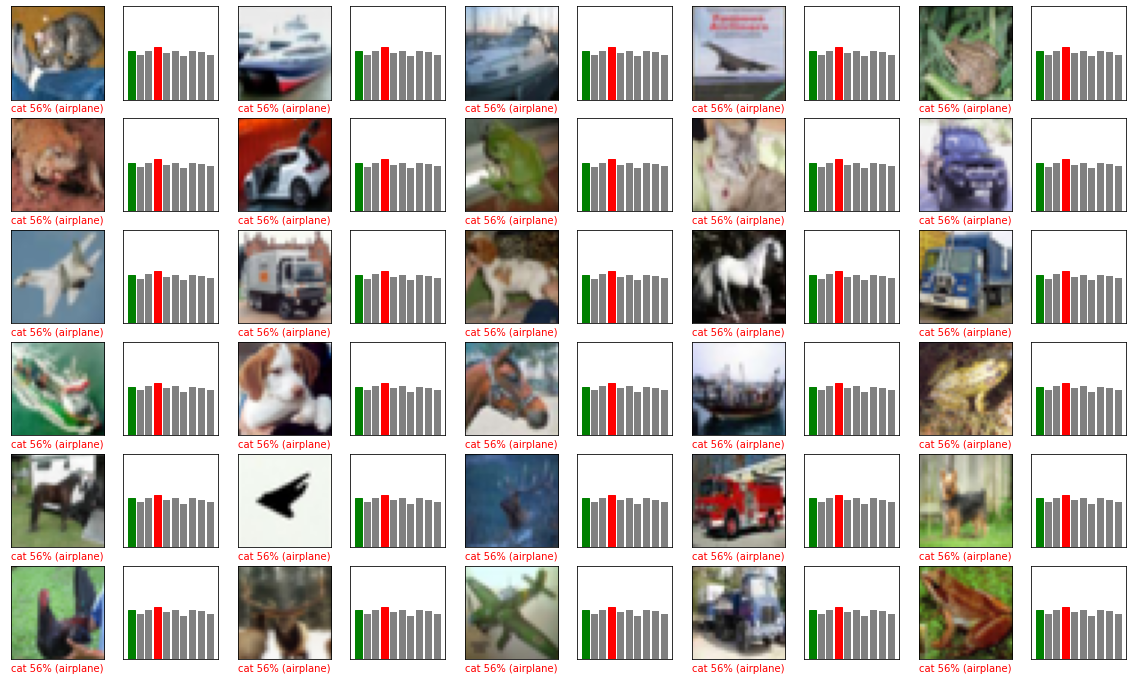

In [221]:
num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

comparison between each model and give reasons for the difference in results:
Though model2 is having high accuracy because of less epoch but actual accuracy is obtained when adam optimiser is used. Adamax optimiser with learning rate 0.1 yield less accuracy.